In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
#import colorcet as cc

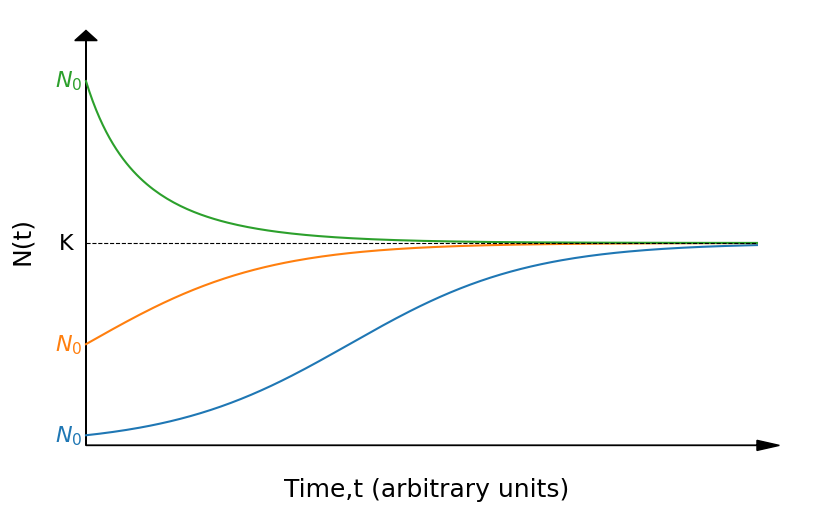

In [42]:
# Parameters for logistic growth
K = 1.0  # carrying capacity
r = 0.5  # growth rate
t = np.linspace(0, 15, 200)  # time

# Different initial populations
N0_values = [0.05, 0.5, 1.8]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Logistic growth function
def logistic_growth(N0, r, K, t):
    return K * N0 * np.exp(r * t) / (K + N0 * (np.exp(r * t) - 1))

# Plotting
plt.figure(figsize=(10, 6))
for N0,color in zip(N0_values,colors):
    N_t = logistic_growth(N0, r, K, t)
    plt.plot(t, N_t, label=f'N0={N0}',color=color)

# Remove the default axes
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')

# Add arrows
plt.arrow(0, 0, max(t), 0, head_width=0.05, head_length=0.5, fc='k', ec='k')
plt.arrow(0, 0, 0, 2.0, head_width=0.5, head_length=0.05, fc='k', ec='k')

# Plot formatting
plt.plot([0, max(t)], [K, K], "k--", linewidth=0.8)
plt.text(-0.6, K, 'K', verticalalignment='center', fontsize=16)
plt.text(-0.7, N0_values[0], '$N_0$', verticalalignment='center', fontsize=16,color=colors[0])
plt.text(-0.7, N0_values[1], '$N_0$', verticalalignment='center', fontsize=16,color=colors[1])
plt.text(-0.7, N0_values[2], '$N_0$', verticalalignment='center', fontsize=16,color=colors[2])
plt.xlabel('Time,t (arbitrary units)',fontsize=18)
plt.ylabel('N(t)',fontsize=18)
plt.xticks([])  # Hide x-axis numbers
plt.yticks([])  # Hide y-axis numbers
plt.show()


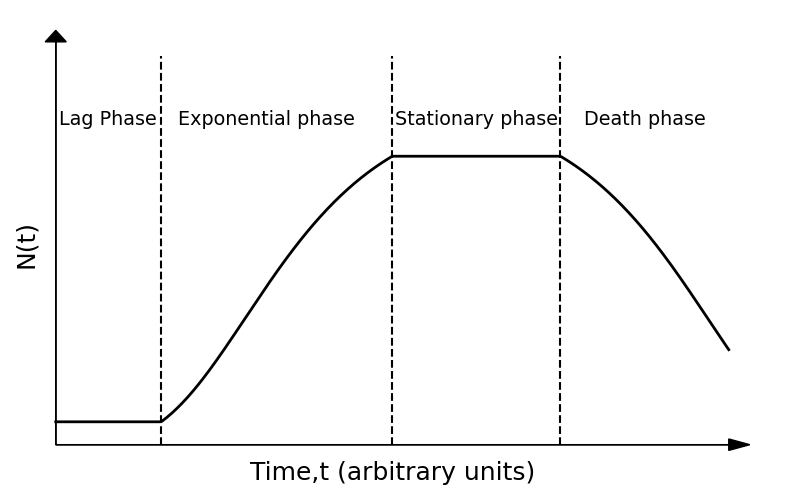

In [102]:
# Gompertz function for growth and decay
def gompertz(t, A, b, c):
    return A * np.exp(-np.exp(b - c * t))

# Parameters for the phases
A = 15
b_growth = 1
c_growth = 0.5
b_decay = 1
c_decay = 0.5

# Create time data
time = np.linspace(0, 16, 400)
N = np.piecewise(time, 
                 [time < 2.5, (time >= 2.5) & (time < 8), (time >= 8) & (time < 12), time >= 12], 
                 [lambda x: 1, 
                  lambda x: gompertz(x-2.5, A, b_growth, c_growth), 
                  lambda x: gompertz(8-2.5, A, b_growth, c_growth), 
                  lambda x: gompertz(x-17.5, A, b_decay, -c_decay)])

# Plotting
plt.figure(figsize=(10, 6))

# Remove the default axes
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_color('none')
plt.gca().spines['left'].set_color('none')

# Adding arrows instead of axes
plt.arrow(0, 0, max(time), 0, head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.arrow(0, 0, 0, max(N)+5, head_width=0.5, head_length=0.5, fc='k', ec='k')

plt.plot(time, N, lw=2,color='black')
plt.plot([2.5, 2.5], [0, 17], 'k--')
plt.plot([8, 8], [0, 17], 'k--')
plt.plot([12, 12], [0, 17], 'k--')
plt.text(1.24, 14, 'Lag Phase', ha='center', fontsize=13.8)
plt.text(5, 14, 'Exponential phase', ha='center', fontsize=13.8)
plt.text(10, 14, 'Stationary phase', ha='center', fontsize=13.8)
plt.text(14, 14, 'Death phase', ha='center', fontsize=13.8)
plt.text(max(time)/2, -1.5, 'Time,t (arbitrary units)', ha='center', fontsize=18)
plt.text(-1, (max(N)+5)/2, 'N(t)', va='center', rotation='vertical', fontsize=18)
plt.xticks([])  # Hide x-axis numbers
plt.yticks([])  # Hide y-axis numbers
plt.show()
